In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Bayes theorem

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Interpretation: 

1. we know something about $A$, denoted as **the prior** $P(A)$
1. we see something on the world, $B$, which might change our belief of the world
1. $P(B)$ is the probability of seeing what we just saw
1. $P(B|A)$ is the probability of seeing what we just saw, if $A$ was true
1. $P(A|B)$ is our new belief on $A$, given what we just saw.

if $A$ is binary, it can also be stated as

$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|\neg A)P(\neg A)}$$

or if $A$ is discrete such that $A=\{A_0, A_1, ..., A_n\}$

$$P(A|B) = \frac{P(B|A)P(A)}{\sum_{A_i \in A}P(B|A_i)P(A_i)}$$


or, if $A$ is continuous

$$P(A|B) = \frac{P(B|A)P(A)}{\int P(B|A)P(A)dA}$$


Example:

- $A$: the patient has cancer
- $B$: the patient has a positive result of the test


- $P(A)=1\%$: general probability of the population having cancer, therefore $P(\neg A)=99\%$
- $P(B) = P(B|A) + P(B|\neg A)$: probability of having a positive test result for cancer
- $P(B|A) = 90\%$: probability of having a positive test given that the patient has cancer
- $P(B|\neg A) = 9.6\%$: probability of having a positive test given that the patient **does not** have cancer

if a patient has a positive result, what is the probability of having cancer?


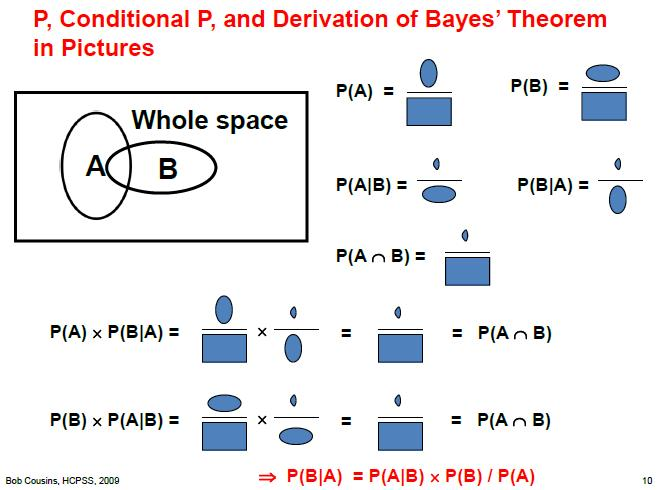

In [2]:
from IPython.display import Image
Image(filename='imgs/bayes_slide.jpg')

In [3]:
def pA_given_B(pA,pB_given_A, pB_given_not_A):
    p_not_A = 1-pA
    pB = pB_given_A * pA + pB_given_not_A * p_not_A
    return pB_given_A * pA / pB


In [4]:
b = pA_given_B(pA=.01, pB_given_A=.9, pB_given_not_A=.096)
print b

0.0865051903114


In [5]:
b = pA_given_B(pA=.01, pB_given_A=.9, pB_given_not_A=.01)
b

0.4761904761904762

observe how the probability of having cancer given that the test was positive changes as the test becomes **more sensible** (detects better the cases with actual disease, $P(B|A)$ increases) or it becomes **more specific** (detects better the cases without disease, $P(B|\neg A)$ decreases).

intuitively, as the test becomes more specific (has less false detections) we should believe much more its results when positive.

practice: if the question is posed inversely (**what is the probability of not having cancer, when the test is negative?**), how would the probabilities evolve?

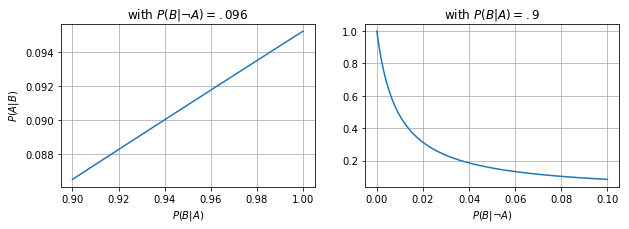

In [6]:
plt.figure(figsize=(10,3))
plt.subplot(121)
p_range = np.linspace(.9,1,100)
p = [pA_given_B(pA=.01, pB_given_A=i, pB_given_not_A=.096) for i in p_range]
plt.plot(p_range, p)
plt.xlabel("$P(B|A)$")
plt.ylabel("$P(A|B)$")
plt.grid()
plt.title("with $P(B|\\neg A)=.096$")

plt.subplot(122)
p_range = np.linspace(0,.1,100)
p = [pA_given_B(pA=.01, pB_given_A=.9, pB_given_not_A=i) for i in p_range]
plt.plot(p_range, p)
plt.xlabel("$P(B|\\neg A)$")
plt.grid()
plt.title("with $P(B|A)=.9$")



## Probability of data

We have a coin, we flip it 5 times and get the following sequence, which becomes our dataset

$$D = \{1,1,1,0,1\}$$

what is, $P(D)$ the probability of $D$? This is, what is the probability of observing what we have observed? Is it a rare event?

**ANSWER**: it depends on how it was generated. In general $P(D) = P(H)^4 \times P(T)^1$, where $P(H)$ and $P(T)$ are the probabilities of having heads or tails in a single flip.

- If the coin is fair, $P(H)=P(T)=0.5$ and $P(D)=0.5^5 = 0.03125 $
- If $P(H)=.7$ and $P(T)=.3$ then $P(D)=.7^4 * .3 = 0.07203$
- If $P(H)=.4$ and $P(T)=.6$ then $P(D)=.4^4 * .6 = 0.01536$

which makes intuitive sense: since we have seen a lot of heads, if our coin is biased towards heads our observation is more likely.

Observe we can parametrize this:

$$\theta=P(H)=1-P(T)$$

so that:

$$P(D|\theta)=\theta^h \times (1-\theta)^t$$

where $h$ and $t$ are the number of observed heads and tails respectively. In this case:

- $P(D|\theta_{.5})=0.03125$
- $P(D|\theta_{.7})=0.07203$
- $P(D|\theta_{.4})=0.01536$

this is, **THE PROBABILITY OF OUR DATA DEPENDS ON THE VALUE OF $\theta$ THAT GENERATED IT**

however, in general **WE DO NOT KNOW** the actual value of $\theta$ that generated our data $D$. 

we could obtain estimations of $\theta$ based on our observed dat $D$. For instance, what is the value of $\theta$ for which $P(D|\theta)$ is greatest (i.e. the **maximum likelihood estimator of $\theta$**, more below):

$$MLE(\theta)=\underset{\theta}{arg\;max} \;\;P(D|\theta)$$

which is an estimator of the **actual unknown value of $\theta$**. Observe how if the actual $\theta$ that generates our data is different that our estimation the probabilities assigned to our data vary.


0.03125 0.07203 0.01536


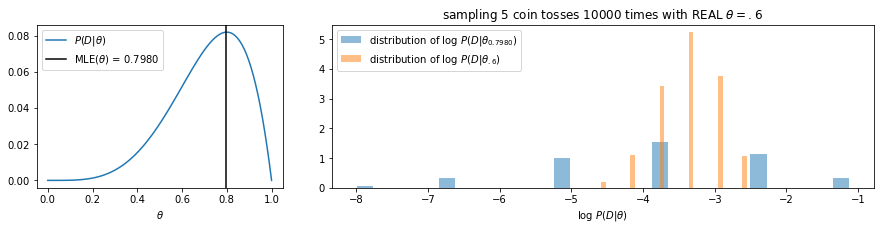

In [7]:
sample_coin_toss = lambda theta,n: (np.random.random(n)<theta)*1

pdt = lambda D, theta: theta**np.sum(D==1)*(1-theta)**np.sum(D==0)

D = np.r_[1,1,1,0,1]
print pdt(D,.5), pdt(D,.7), pdt(D,.4)

plt.figure(figsize=(15,3))
plt.subplot2grid((1, 3), (0, 0))
t = np.linspace(0,1,100)
p = [pdt(D,i) for i in t]
plt.plot(t, p, label="$P(D|\\theta)$")
mle=t[np.argmax(p)]
plt.axvline(t[np.argmax(p)], color="black", label="MLE($\\theta$) = %.4f"%mle)
plt.xlabel("$\\theta$")
plt.legend(loc="upper left")

plt.subplot2grid((1, 3), (0, 1), colspan=3)
plt.hist([np.log(pdt(sample_coin_toss(.6,len(D)),mle)) for i in range(10000)], normed=True, bins=30,
            label = "distribution of log $P(D| \\theta _{%.4f})$"%mle,alpha=.5)

plt.hist([np.log(pdt(sample_coin_toss(.6,len(D)),.6)) for i in range(10000)], normed=True, bins=30,
         label = "distribution of log $P(D| \\theta _{.6})$", alpha=.5)
plt.xlabel("log $P(D|\\theta)$")
plt.title("sampling %d coin tosses 10000 times with REAL $\\theta=.6$"%len(D))
plt.legend(loc="upper left")

Now, assume **WE HAVE SOME UNCERTAINTY ON $\theta$** so that we know that either $\theta=.7$ or $\theta=.4$, both values are equally probable and the rest of the values is not possible (an oracle tells us this):

$$P(\theta_{.7}) = P(\theta_{.4}) = 0.5\;\;\;\;P(D|\theta_i)=0\;\;for\;i\neq .7\;and\;i\neq .4$$ 

then we can obtain the probability of our data $D$, **regardless** the value of $\theta$,

$$P(D) = P(\theta_{.7})\times P(D|\theta_{.7}) + P(\theta_{.4})\times P(D|\theta_{.4}) = 0.043695$$

or, in general, if we have $i$ possible values for $\theta$.

$$P(D) = \sum_i P(\theta_i) \times P(D|\theta_i)$$

In [8]:
pt  = lambda theta: .5 if theta==.7 or theta==.4 else 0
print pt(.7)*pdt(D,.7) + pt(.4)*pdt(D,.4)


0.043695


if our uncertainty of $\theta$ is total, a reasonable assumption is that all possible values of $\theta$ have the same probability, from a uniform distribution on the interval $[0,1]$:

$$P(\theta) \sim \mathbf{U}(0,1)\;\;\;\Rightarrow\;\; P(\theta)=1\; \forall \theta \in [0,1]$$

then

$$P(D) = \int_0^1 P(D|theta) \times P(\theta) d\theta$$

in our particular case

$$P(D) = \int_0^1 \theta^4(1-\theta) d\theta$$

which can be obtained analytically or through a numerical approximation

In [10]:
import sympy as sp
import scipy as sc
t = sp.symbols("\\theta")
print "analytical", (t**5*(1-t)).integrate((t,0,1))
print "numerical ", sc.integrate.quad(lambda t:t**5*(1-t), 0,1 )[0]

analytical 1/42
numerical  0.0238095238095


using Bayes, the probability of a certain $\theta$ given the observed data $D$ is given by:

$$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)} = \frac{P(D|\theta)P(\theta)}{\int P(D|\theta)P(\theta)d\theta}$$

In general, **computing $P(D)$ is VERY difficult** and can only be done it numerically, if at all.

For certain problems using $P(\theta|D)$ we may not need $P(D)$. For instance, for MLE we want:

$$\underset{\theta}{arg\;max}\;P(\theta|D) = \underset{\theta}{arg\;max} \frac{P(D|\theta)P(\theta)}{P(D)}$$

but since $P(D)$ is the same for all $\theta$, it is not needed to select the best $\theta$

$$\underset{\theta}{arg\;max}\;P(\theta|D) = \underset{\theta}{arg\;max}\; P(D|\theta)P(\theta)$$